In [106]:
import pandas as pd 
import scipy.stats as stats
import seaborn as sns
import numpy as np
import pingouin as pg
import matplotlib.pyplot as plt
import os
import glob
from scipy.signal import butter,filtfilt
import scipy

sns.set_theme(style="whitegrid")

# Get single participant's conation data

In [107]:
p1 = pd.read_table('Data/Participant1/conation.txt',header=None).T
p2 = pd.read_table('Data/Participant2/conation.txt',header=None).T
p3 = pd.read_table('Data/Participant3/conation.txt',header=None).T
p4 = pd.read_table('Data/Participant4/conation.txt',header=None).T
p5 = pd.read_table('Data/Participant2/conation.txt',header=None).T
p6 = pd.read_table('Data/Participant6/conation.txt',header=None).T
p7 = pd.read_table('Data/Participant7/conation.txt',header=None).T
p8 = pd.read_table('Data/Participant8/conation.txt',header=None).T
p9 = pd.read_table('Data/Participant9/conation.txt',header=None).T
p10 = pd.read_table('Data/Participant10/conation.txt',header=None).T
p11 = pd.read_table('Data/Participant11/conation.txt',header=None).T
p12 = pd.read_table('Data/Participant12/conation.txt',header=None).T
p13 = pd.read_table('Data/Participant13/conation.txt',header=None).T

p1


,0,1,2
0,7,7,6


# Extract conation data, taken from all participants

In [119]:
filepath = 'Data/'
fileConation = 'conation.txt'

#find folder of each participant
participants = os.listdir('Data/') 
print(participants)

#find the conation file inside the participant folder
conationFiles = []

for p in participants:
    conationFiles.append(filepath+p+'/'+fileConation)
print(conationFiles)

#combine different participant's conation data
data = []

# for f in conationFiles:
#     data.append(pd.read_table(f, header=None))

for f in conationFiles:
    df = pd.read_table(f, header=None)
    data.append(df.T)

conation = pd.concat((data), ignore_index=True)

conation["Avg_per_person"] = conation.mean(axis = 1)

conation

['Participant1', 'Participant10', 'Participant11', 'Participant12', 'Participant13', 'Participant2', 'Participant3', 'Participant4', 'Participant5', 'Participant6', 'Participant7', 'Participant8', 'Participant9']
['Data/Participant1/conation.txt', 'Data/Participant10/conation.txt', 'Data/Participant11/conation.txt', 'Data/Participant12/conation.txt', 'Data/Participant13/conation.txt', 'Data/Participant2/conation.txt', 'Data/Participant3/conation.txt', 'Data/Participant4/conation.txt', 'Data/Participant5/conation.txt', 'Data/Participant6/conation.txt', 'Data/Participant7/conation.txt', 'Data/Participant8/conation.txt', 'Data/Participant9/conation.txt']


,0,1,2,Avg_per_person
0,7,7,6,6.666667
1,7,6,6,6.333333
2,6,5,4,5.000000
3,6,4,6,5.333333
4,6,6,6,6.000000
5,6,6,4,5.333333
6,6,6,6,6.000000
7,5,4,3,4.000000
8,3,3,4,3.333333
9,7,4,6,5.666667


In [155]:
conationMean = conation.iloc[:,0:3].mean(axis = 0)
conationMeanTable = pd.DataFrame(conationMean).T

conationMeanTable


,0,1,2
0,6.153846,5.384615,5.384615


# Functions to add labels to graphs

In [109]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with 2 decimal places
        label = "{:.3f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [110]:
def add_value_labels_int(ax, spacing=5):

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with 2 decimal places
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

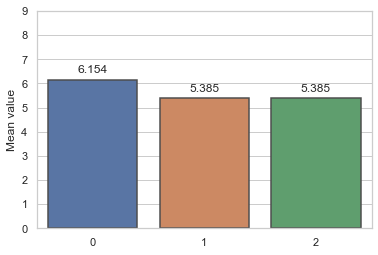

In [156]:
ax = sns.barplot(data=conationMeanTable, linewidth=1.5, edgecolor=".3")
ax.set(ylim=(0, 9))
ax.set(ylabel='Mean value')
add_value_labels(ax)